In [1]:
# importing necessary libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate
from scipy import interpolate

# setting figure size (change accordingly)
plt.rcParams['figure.figsize'] = [10, 10]

# close all plots every time we rerun the program
plt.close('all')


pi = np.pi

## Parameters & Variables


### Length $l(t)$:

Must be a strictly increasing function. One example is the simplest linear growth scheme with $l(t) = l_0 + \dot{l} t$.


### Radius $r(s,t)$:

The radius is decided by one function $\tau$ as:

$$ r(s,t) = \tau(l(t) - s) $$

where $\tau$ is the **taper function** defined in $[0, L]$, which links the distance measured from the tip to the radius. $\tau(0)$ is the radius at the tip, the point of primary growth. Basically $\tau(x)$ will be a graph of the final radius distribution at time $T$ and length $L$ with flipped direction. A condition that must be met for $\tau$ is $\tau' \geq 0$, for all $x \in [0, L]$ (because the radius should never decrease). One example may be a linear scheme as $\tau(x) = r_{tip} + \alpha x$ with $alpha$ determining the taper slope.


### Local angle $\theta(s,t)$ and actual curvature $\kappa(s,t)$

$\theta(s,t)$ is the angle between the horizontal ($x$-axis positive direction) and the tangent (material positive direction) at point $s$ at time $t$.
Its spatial derivative is the actual curvature, $\partial_s \theta(s,t) = \kappa(s,t)$.


### Intrinsic curvature $\kappa_g(s,t)$

Intrinsic curvature $\kappa_g(s,t)$ is the curvature in the loadless state. The applied moment on the beam will be related to the difference between the two curvatures, $\kappa - \kappa_g$.

### Other parameters

- Density $\rho$
- Gravitational acceleration $g$
- Young's modulus $E$ ... maybe this should be variable in the future


## General scheme


### Quasi-static equilibrium

For every time $t$ the equilibrium holds. Obtained from the assumptions of Euler-Bernoulli beam, with the second moment of inertia as $I = \pi Er^4/4$

$$ \dfrac{\pi E}{4} \partial_s \left[ r^4 (\kappa - \kappa_g) \right] = \rho g \cos{\theta} \int_s^{l(t)} \pi r^2 \; d\tilde{s} $$
$$ \implies \partial_s \left[ r^4 (\kappa - \kappa_g) \right] = \dfrac{4 \rho g}{E} \cos{\theta} \int_s^{l(t)} r^2 \; d\tilde{s} $$

The boundary conditions are:

- $\theta(0,t) = \theta_0$ (clamped end to the main trunk)

- $\kappa(l(t),t) = \kappa_g(l(t),t)$ (no moment at tip)


### Evolution of intrinsic curvature

From the assumptions of the newly added layers, we have the evolution equation of the intrinsic curvature $\kappa_g$:

$$ \partial_t \kappa_g = 4 \dfrac{\partial_t r}{r} (\kappa - \kappa_g) + 48 \pi \dfrac{\partial_t r}{r^2} \epsilon(\theta,\kappa) $$

with the initial condition $\kappa_g(s,0) = 0$ (no intrinsic curvature in the beginning). $\epsilon$ is a given function which denotes the stress strain created through the creation of reaction wood: it gives some kind of control to the branch (such as gravitropism). To model the recovery of branch posture to some preferred angle $\theta_P$, one can let $\epsilon = \epsilon_{max} \sin{(\theta_P - \theta)}$.

Using these two differential equations (one spacial, one temporal), $\theta(s,t)$ can be obtained to know the shape of the branch.



## Non-dimensionalization

We modify the variables and equations to make it into a non-dimensional scheme. We use the non-dimensional arclength

$$ \eta = \dfrac{s}{l(t)}, \; \eta \in [0,1]$$

to represent the spacial position in the branch; the base is $\eta = 0$, the tip is $\eta = 1$ for any time. Thus, everything can be represented by the pair ($\eta$, $t$) instead of ($s$, $t$). The functions will be non-dimensionalized and change their representation as follows:

- $\Theta(\eta,t) = \theta(s,t)$

- $K(\eta,t) = l(t) \kappa(s,t) = \partial_\eta \Theta(\eta,t)$

- $K_g(\eta, t) = l(t) \kappa_g(s,t)$

- $R(\eta, t) = \dfrac{r(s,t)}{r(0,t)} = \dfrac{\tau(l(t)-s)}{\tau(l(t))}$


### Quasi-static equilibrium (non-dim)

$$ \partial_s \left[ r^4 (\kappa - \kappa_g) \right] = \dfrac{4 \rho g}{E} \cos{\theta} \int_s^{l(t)} r^2 \; d\tilde{s} $$

$$ \implies \left[ R^4 (K - K_g) \right]' = \dfrac{4 \rho g [l(t)]^3}{E [r(0,t)]^2} \cos{\Theta} \int_\eta^{1} R^2 \; d\tilde{\eta} $$

where $\partial_\eta (\cdot) = (\cdot)'$.

We can let $k(t) = [l(t)]^3/[r(0,t)]^2 = [l(t)]^3/[\tau(l(t))]^2$ and finally write

$$ \implies \left[ R^4 (K - K_g) \right]' = 4 \rho g k(t) \cos{\Theta} \int_\eta^{1} R^2 \; d\tilde{\eta} $$


### Evolution of intrinsic curvature (non-dim)

$$ \partial_t \kappa_g = 4 \dfrac{\partial_t r}{r} (\kappa - \kappa_g) + 48 \pi \dfrac{\partial_t r}{r^2} \epsilon(\theta,\kappa) $$

$$ \implies \dot{K_g} = \dfrac{\dot{l}}{l} \left[ K_g + \eta K_g' - \dfrac{R'}{R} \left(4(K-K_g) + \dfrac{48 \pi \epsilon}{R} \dfrac{l}{\tau(l)}\right) \right] $$

### Conditions (non-dim)

- $\Theta(0,t) = \theta_0$

- $K(1,t) = K_g(1,t)$

- $K(\eta,0) = 0$

### Numerical scheme

We solve the equilibrum equation with a ODE solver of scipy (scipy.bvp_solve) treating $t$ as a constant. Then we update $K_g$ with the evolution equation with small time step, and keep repeating these two processes.

After $\Theta(\eta,t)$ is obtained, one can draw the shape of the branch using the relations

$$ x(\eta,t) = l(t) \int_0^{\eta} \cos{\Theta} \, d\tilde{\eta} $$
$$ y(\eta,t) = l(t) \int_0^{\eta} \sin{\Theta} \, d\tilde{\eta} $$

along with the information $r(s,t)$.

In [4]:
# Set longitudinal growth parameters
theta0 = 0           # Initial angle [1]
T = 1e8                    # Final time [s]
l0 = 1                     # Initial length [cm]
L = 100                    # Final length [cm]

# Set the step size of eta and t (used for numerical solver)
acc_eta = 1e-3
acc_t = 1e-3
n_eta = int(1/acc_eta + 1) # Number of eta increments
n_t = int(1/acc_t + 1)     # Number of time increments
d_eta = 1/(n_eta - 1)      # eta increment size
d_t = T/(n_t - 1)          # t increment size

# Initialize space
eta = np.linspace(0, 1, n_eta)

# Initialize time
t = np.linspace(0, T, n_t)
it = 0

# Set primary growth ... may be non-linear
vl = (L-l0)/T
l = l0 + vl*t              # Branch length [cm]           (time)
dldt = np.gradient(l,t)    # Primary growth speed [cm/s]  (time)

# Set taper function
nv = 6
r1 = 0.2
R = 8
beta = 0
alpha = (R-r1)/L
params = (alpha,beta)

def taper(x,r1,params):
  return r1 + params[0]*x + params[1]*x**1.5

# Define r = taper(l-s) = taper(l(1-eta))
# and R = r(eta,t)/r(0,t)
r = np.zeros((n_t,n_eta))
R = np.zeros((n_t,n_eta))
for i in range(n_t):
  # r[i,:] = taper(l[i]*(1-eta),r1,alpha)
  r[i,:] = taper(l[i]*(1-eta),r1,params)
  R[i,:] = r[i,:]/r[i,0]
# Define derivatives of R
dRdeta = np.gradient(R,eta,axis=1)
dRdt = np.gradient(R,t,axis=0)
# Define the integral of R^2
intR2 = np.zeros((n_t,n_eta))
for i in range(n_t):
  for j in reversed(range(n_eta-1)):
    intR2[i,j] = intR2[i,j+1] + d_eta*R[i,j]**2

# Set material parameters
rhog = 1.0 # gf / cm^3
E =  5000  # kgf / cm^2

# Set control parameters
epsmax = 1e-5
ctrltype = 1
thetaP = pi/2 - 0.001# preferred angle


# Define control epsilon
def epsilon(epsmax,ctrltype,theta,dtheta,thetaP=pi/4):
  if ctrltype == 0:
    return 0*theta
  if ctrltype == 1:
    return epsmax * np.sin(thetaP - theta)

# Frames used to calculate coordinates and output videos
# Dont set this too high! not really necessary
frames = range(0,n_t,int(1/acc_t/300))

# Define updating function for intrinsic curvature K_g
def updateKg(it,eta,Kg,Theta,K,dldt,l,R,dRdeta):
  global d_t, epsmaxs, ctrltype, thetaP, r1, params
  # K = np.gradient(Theta,eta)
  dKg = dldt[it]/l[it]*(Kg + eta*np.gradient(Kg) - dRdeta[it,:]/R[it,:]*(4*(K-Kg) + 48*pi*epsilon(epsmax,ctrltype,Theta,K,thetaP)*l[it]/(taper(l[it],r1,params)*R[it,:])))
  # dK = 0
  return Kg + dKg*d_t

# Define the main equililbrium equation
def equil(eta,y):
  global it, t, r0, l, rhog, E, r1, params, Kg_interp, R_interp, dR_interp, iR_interp, taper
  theta, omega = y
  eq = np.vstack((omega, np.gradient(Kg_interp(eta)) - 4*dR_interp(eta)/R_interp(eta) * (omega - Kg_interp(eta))+ 4*rhog*l[it]**3/(E*taper(l[it],r1,params)**2) * np.cos(theta) * iR_interp(eta)))
  return eq
  
# Define the boundary conditions
def bc(ya, yb):
  global theta0, Kg
  #return np.array([ya[0] - theta0, yb[1]])
  return np.array([ya[0] - theta0, yb[1] - Kg[-1]])

# Plotting function
def areaplot(ax,x,y,theta,r,color='k',label="",ticks=101):
  N = len(x)
  intrv = int(np.floor((N-1)/(ticks-1)))
  indices = list(range(0,N,intrv))
  X_top = np.take(x - r/2 * np.sin(theta), indices)
  X_bot = np.take(x + r/2 * np.sin(theta), indices)
  Y_top = np.take(y + r/2 * np.cos(theta), indices)
  Y_bot = np.take(y - r/2 * np.cos(theta), indices)
  ax.plot([X_top[0],X_bot[0]],[Y_top[0],Y_bot[0]],color=color,alpha=0.7,label=label)
  ax.plot([X_top[-1],X_bot[-1]],[Y_top[-1],Y_bot[-1]],color=color,alpha=0.7)
  ax.plot(X_top, Y_top, color=color, alpha=0.7)
  ax.plot(X_bot, Y_bot, color=color, alpha=0.7)
  ax.plot(x,y, color=color,)

In [5]:
Theta_matrix = np.zeros((n_t,n_eta))
K_matrix = np.zeros((n_t,n_eta))
Kg_matrix = np.zeros((n_t,n_eta))
k_matrix = np.zeros((n_t,n_eta))
kg_matrix = np.zeros((n_t,n_eta))

R_interp = interpolate.interp1d(eta, R[0,:])
dR_interp = interpolate.interp1d(eta, dRdeta[0,:])
iR_interp = interpolate.interp1d(eta, intR2[0,:])

it = 0
theta_init = -0.1*np.ones((2,n_eta))
Kg = np.zeros(n_eta)
Kg_interp = interpolate.interp1d(eta, Kg)
sol = integrate.solve_bvp(equil, bc, eta, theta_init)
Theta = sol.y[0,:]
K = sol.y[1,:]
Theta_matrix[0,:] = Theta
K_matrix[0,:] = K
k_matrix[0,:] = K/l[0]

for it in range(1,n_t):
  theta_init = np.vstack((Theta,K))
  Kg = updateKg(it,eta,Kg,Theta,K,dldt,l,R,dRdeta)
  Kg_interp = interpolate.interp1d(eta, Kg)
  kg_matrix[it,:] = Kg/l[it]
  Kg_matrix[it,:] = Kg
  sol = integrate.solve_bvp(equil, bc, eta, theta_init)
  Theta = sol.y[0,:]
  K = sol.y[1,:]
  Theta_matrix[it,:] = Theta
  K_matrix[it,:] = K
  k_matrix[it,:] = K/l[it]

In [7]:
coord = np.zeros((2*n_t,n_eta))
for frame in frames:
  theta_capt = interpolate.interp1d(eta, Theta_matrix[frame,:])
  for j in range(n_eta-1):
    coord[2*frame,j+1] = coord[2*frame,j] + d_eta * l[frame]*np.cos(Theta_matrix[frame,j])
    coord[2*frame+1,j+1] = coord[2*frame+1,j] + d_eta * l[frame]*np.sin(Theta_matrix[frame,j])

/var/folders/y7/00rktxln7550gdkzz1mhj5040000gn/T/ipykernel_19391/3184456196.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figT.show()


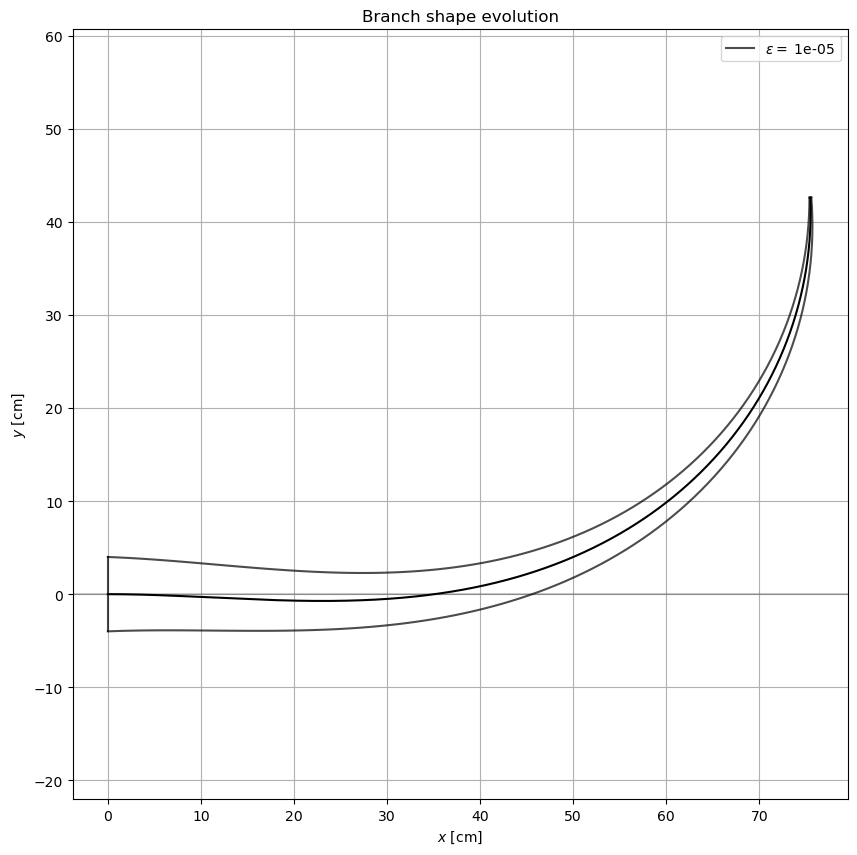

In [9]:
# Draw the final branch shape (at time T)
# Also store the final graph axes information

figT, axT = plt.subplots()
axT.set_title("Branch shape evolution")
axT.set_xlabel(r'$x$ [cm]')
axT.set_ylabel(r'$y$ [cm]')
axT.axhline(color='k',alpha=0.2)
areaplot(axT,coord[2*frames[-1],:],coord[2*frames[-1]+1,:],Theta_matrix[frames[-1],:],r[frames[-1],:],label=r'$\epsilon =$ {}'.format(epsmax))
axT.grid()
axT.axis('equal')
axT.legend()
xlim = axT.get_xlim()
ylim = axT.get_ylim()
figT.show()

In [11]:
# (Optional) Animate the branch shape
# (About 3 mins)

figanim, axanim = plt.subplots()

def update(frame):
  global figanim, axanim, xlim, ylim, coord, Theta_matrix, r
  axanim.cla()
  axanim.set_title("Branch shape evolution")
  axanim.set_xlabel(r'$x$ [cm]')
  axanim.set_ylabel(r'$y$ [cm]')
  axanim.axhline(color='k',alpha=0.2)
  axanim.grid()
  axanim.axis('equal')
  areaplot(axanim,coord[2*frame,:],coord[2*frame+1,:],Theta_matrix[frame,:],r[frame,:],label=r'$\epsilon =$ {}'.format(epsmax))
  #axanim.set_xlim(xlim[0],xlim[1])
  #axanim.set_ylim(ylim[0],ylim[1])
  axanim.legend()

ani = animation.FuncAnimation(figanim, update, frames, interval=40, repeat=False)
writervideo = animation.FFMpegWriter(fps=20)
ani.save('shape.mp4', writer=writervideo)
plt.close()

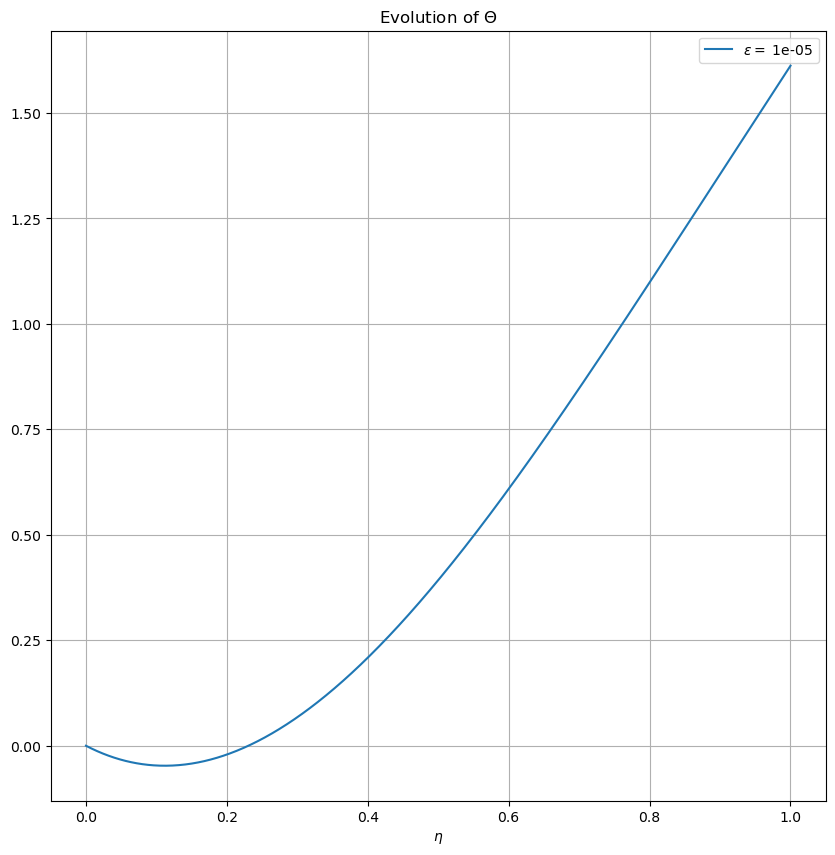

In [12]:
# Draw the final Theta distribution (at time T)
# Also store the final graph axes information

figT, axT = plt.subplots()
axT.set_title(r'Evolution of $\Theta$')
axT.set_xlabel(r'$\eta$')
axT.plot(eta,Theta_matrix[frames[-1],:],label=r'$\epsilon =$ {}'.format(epsmax))
axT.grid()
axT.legend()
xlim = axT.get_xlim()
ylim = axT.get_ylim()

# (Optional) Animate Theta evolution
# (About 3 mins)

figanim, axanim = plt.subplots()

def update(frame):
  global figanim, axanim, xlim, ylim, Theta_matrix
  axanim.cla()
  axanim.set_title(r'Evolution of $\Theta$')
  axanim.set_xlabel(r'$\eta$')
  axanim.set_xlim(xlim[0],xlim[1])
  axanim.set_ylim(ylim[0],ylim[1])
  axanim.grid()
  axanim.hlines(thetaP,xlim[0],xlim[1])
  axanim.plot(eta,Theta_matrix[frame,:],label=r'$\epsilon =$ {}'.format(epsmax))
  axanim.legend()
  

ani = animation.FuncAnimation(figanim, update, frames, interval=40, repeat=False)
writervideo = animation.FFMpegWriter(fps=20)
ani.save('Theta.mp4', writer=writervideo)
plt.close()

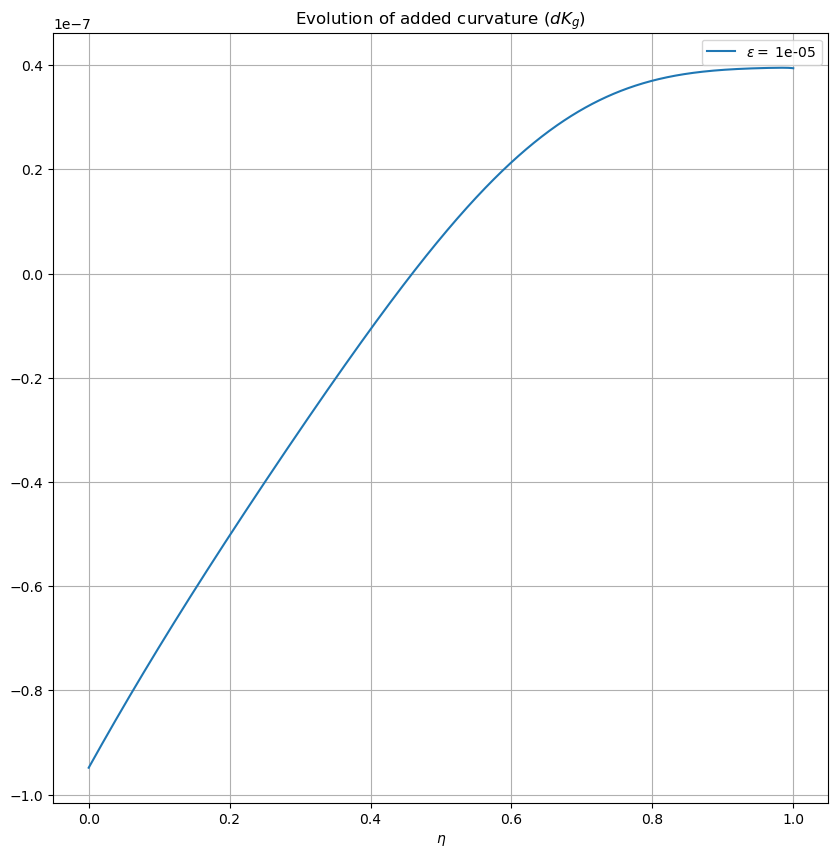

In [13]:
# Draw the how much intrinsic curvature is added
# Also store the final graph axes information

figT, axT = plt.subplots()
axT.set_title(r'Evolution of added curvature ($dK_g$)')
axT.set_xlabel(r'$\eta$')
axT.plot(eta,(Kg_matrix[frames[-1],:]-Kg_matrix[frames[-2],:])/d_t,label=r'$\epsilon =$ {}'.format(epsmax))
axT.grid()
axT.legend()
xlim = axT.get_xlim()
ylim = axT.get_ylim()

# (Optional) Animate dK_g evolution
# (About 3 mins)

figanim, axanim = plt.subplots()

def update(frame):
  global figanim, axanim, xlim, ylim, Kg_matrix
  axanim.cla()
  axanim.set_title(r'Evolution of added curvature (dK_g)')
  axanim.set_xlabel(r'$\eta$')
  axanim.set_xlim(xlim[0],xlim[1])
  axanim.set_ylim(ylim[0],ylim[1])
  axanim.grid()
  for var in range(nv):
    col = (0.5, 1-var/nv, var/nv)
    axanim.plot(eta,(Kg_matrix[frame,:]-Kg_matrix[max(frame-1,0),:])/d_t,label=r'$\epsilon =$ {}'.format(epsmax))
  axanim.legend()
  

ani = animation.FuncAnimation(figanim, update, frames, interval=40, repeat=False)
writervideo = animation.FFMpegWriter(fps=20)
ani.save('dK.mp4', writer=writervideo)
plt.close()

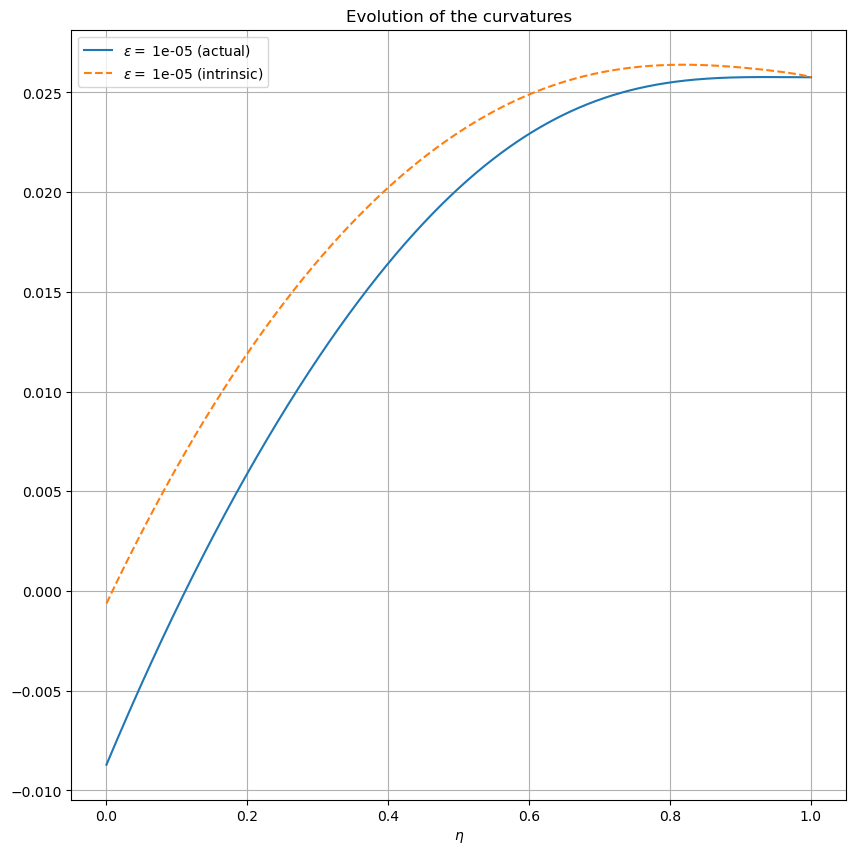

In [14]:
# Draw the final curvatures (at time T)
# Also store the final graph axes information

figT, axT = plt.subplots()
axT.set_title(r'Evolution of the curvatures')
axT.set_xlabel(r'$\eta$')
axT.plot(eta,k_matrix[frames[-1],:],label=r"$\epsilon =$ {} (actual)".format(epsmax))
axT.plot(eta,kg_matrix[frames[-1],:],label=r"$\epsilon =$ {} (intrinsic)".format(epsmax),linestyle="dashed")
axT.grid()
axT.legend()
xlim = axT.get_xlim()
ylim = axT.get_ylim()

# (Optional) Animate the evolution of curvatures and save as mp4
# (About 3 mins)

figanim, axanim = plt.subplots()

def update(frame):
  global figanim, axanim, xlim, ylim, k_matrix, kg_matrix
  axanim.cla()
  axanim.set_title(r'Evolution of the curvatures')
  axanim.set_xlabel(r'$\eta$')
  axanim.set_xlim(xlim[0],xlim[1])
  axanim.set_ylim(ylim[0],ylim[1])
  axanim.grid()
  axanim.plot(eta,k_matrix[frame,:],label=r"$\epsilon =$ {} (actual)".format(epsmax))
  axanim.plot(eta,kg_matrix[frame,:],label=r"$\epsilon =$ {} (intrinsic)".format(epsmax),linestyle="dashed")
  axanim.legend()
  

ani = animation.FuncAnimation(figanim, update, frames, interval=40, repeat=False)
writervideo = animation.FFMpegWriter(fps=20)
ani.save('crvs_dim.mp4', writer=writervideo)
plt.close()

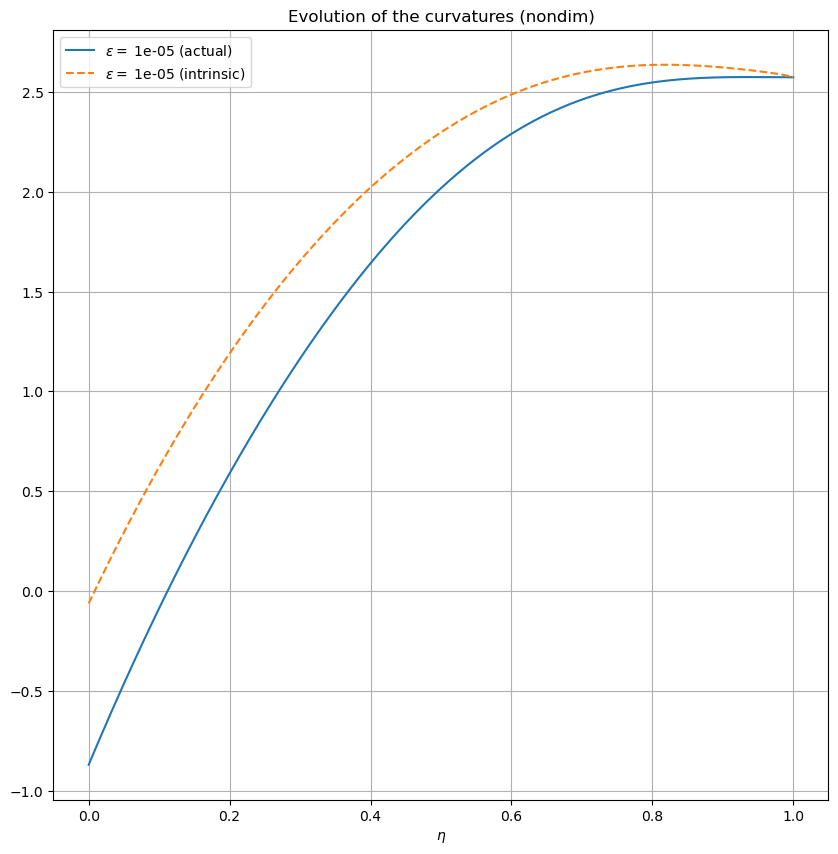

In [16]:
# Draw the final curvatures (at time T)
# Also store the final graph axes information

figT, axT = plt.subplots()
axT.set_title(r'Evolution of the curvatures (nondim)')
axT.set_xlabel(r'$\eta$')
axT.plot(eta,K_matrix[frames[-1],:],label=r"$\epsilon =$ {} (actual)".format(epsmax))
axT.plot(eta,Kg_matrix[frames[-1],:],label=r"$\epsilon =$ {} (intrinsic)".format(epsmax),linestyle="dashed")
axT.grid()
axT.legend()
xlim = axT.get_xlim()
ylim = axT.get_ylim()

# (Optional) Animate the evolution of curvatures and save as mp4
# (About 3 mins)

figanim, axanim = plt.subplots()

def update(frame):
  global figanim, axanim, xlim, ylim, K_matrix, Kg_matrix
  axanim.cla()
  axanim.set_title(r'Evolution of the curvatures (nondim)')
  axanim.set_xlabel(r'$\eta$')
  axanim.set_xlim(xlim[0],xlim[1])
  axanim.set_ylim(ylim[0],ylim[1])
  axanim.grid()
  axanim.plot(eta,K_matrix[frame,:],label=r"$\epsilon =$ {} (actual)".format(epsmax))
  axanim.plot(eta,Kg_matrix[frame,:],label=r"$\epsilon =$ {} (intrinsic)".format(epsmax),linestyle="dashed")
  axanim.legend()
  

ani = animation.FuncAnimation(figanim, update, frames, interval=40, repeat=False)
writervideo = animation.FFMpegWriter(fps=20)
ani.save('crvs_nondim.mp4', writer=writervideo)
plt.close()